In [1]:
import puzzle as puzzle
import tableau as tableau
import matplotlib.pyplot as plt
import matplotlib.patches as pat

In [25]:
plist = puzzle.calculateAllPuzzle("0101","0110","0101")
for p in plist:
    print(p.weight())

In [2]:
def convertStringToDiagram(string):
    L = list(string)
    n = len(L)
    k = 0
    I = []
    for (i, s) in enumerate(L):
        if s == "1":
            k += 1
            I.append(i+1)
    
    diagram = [n - k - I[0] + 1]
    for i in range(k-1):
        diagram.append(diagram[i] - (I[i+1] - I[i]) + 1)
    return diagram


def convertDiagramToString(inputDiagram, n, k):
    diagram = inputDiagram.copy()
    I = [n - k + 1 - diagram[0]]
    if len(diagram) < k:
        diagram += [0 for i in range(k-len(diagram))]
    for j in range(k-1):
        I.append(I[j] + diagram[j] - diagram[j+1] + 1)
    string = [0 for j in range(n)]
    for s in I:
        string[s-1] = 1
    result = list(map( lambda x: str(x), string ))
    return "".join(result)

def min_lexicographical(x, y):
    if x[0] < y[0]:
        return x
    if x[0] > y[0]:
        return y
    if x[1] < y[1]:
        return x
    if x[1] > y[1]:
        return y
    return x

def mysort(ary):
    l = len(ary)
    if l <= 1:
        return ary
    
    former = mysort(ary[:int(l/2)].copy())
    latter = mysort(ary[int(l/2):].copy())
    result = []
    i = 0
    j = 0
    while (i < len(former)) and (j < len(latter)):
        x = former[i]
        y = latter[j]
        if min_lexicographical(x, y) == x:
            result.append(x)
            i += 1
        else:
            result.append(y)
            j += 1
    result += former[i:].copy()
    result += latter[j:].copy()
    return result

In [3]:
l = [3,2,2]
m = [4,2,2]
n = [5,5,3]
c = 8
k = 3


puzzleList = puzzle.calculateAllPuzzle(convertDiagramToString(l, c, k), convertDiagramToString(m, c, k), convertDiagramToString(n, c, k))
tableauList = tableau.calculateAllEdgeLabeledTableaux(l, m, n, c-k)

puzzleWeights = [p.weight(mode="int") for p in puzzleList]
tableauWeights = [t.weight(l, c-k, mode="int") for t in tableauList]

In [4]:
#check that the two calculations are identical
#set(tuple((map( lambda x: tuple(mysort(x)), puzzleWeights )))) == set(tuple((map( lambda x: tuple(mysort(x)), tableauWeights ))))

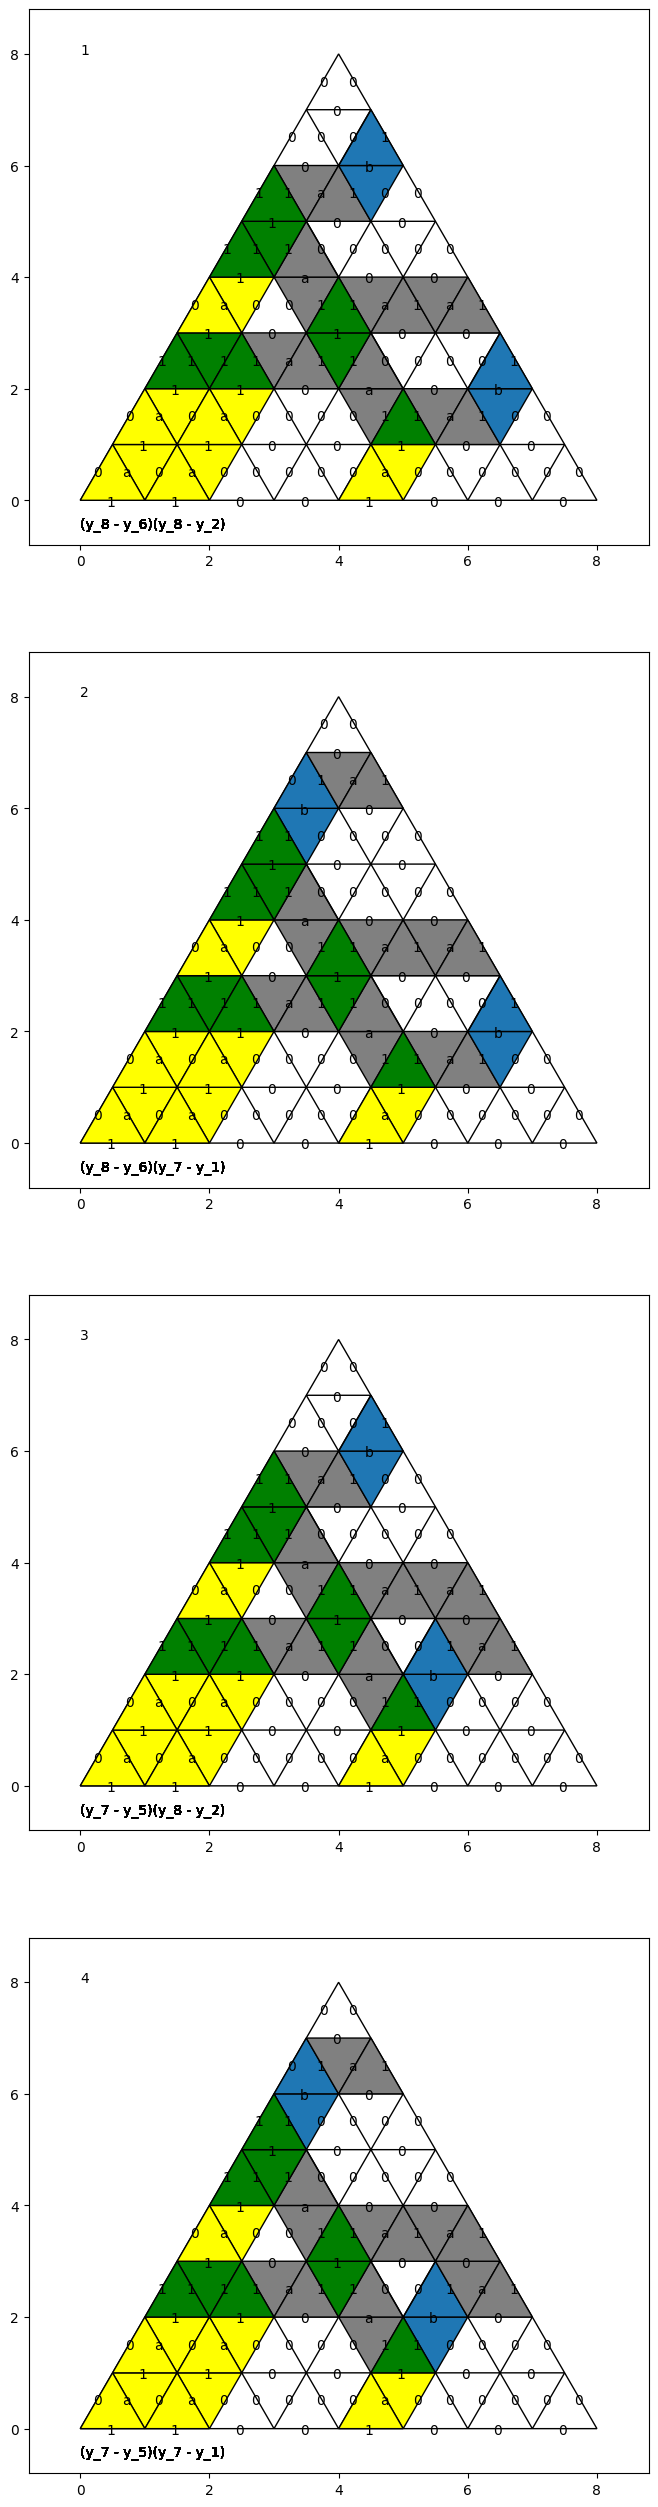

In [5]:
x = len(puzzleList)
fig = plt.figure(figsize=(8, x*8))

def drawPuzzle(p, ax):
    frameTriangle = pat.Polygon(xy=[(0,0), (c,0), (c/2,c)], fill=False)
    ax.add_patch(frameTriangle)
    ax.set_xlim(left=-0.1*c, right=1.1*c)
    ax.set_ylim(bottom=-0.1*c, top=1.1*c)
    pieceList = p.downwardPieceList
    for i in range(1, c):
        for j in range(c-i):
            num = int(j + (i-1) * c - ((i-1)*(i/2)))
            piece = pieceList[num]
            xCoord = j + 1/2*i
            yCoord = i
            if piece.label == ["b","0","1"]:
                triangle = pat.Polygon(xy=[(xCoord, yCoord), (xCoord + 1, yCoord), (xCoord+1/2, yCoord-1)], fill=True, edgecolor="black")
                triangle_upward = pat.Polygon(xy=[(xCoord, yCoord), (xCoord + 1, yCoord), (xCoord+1/2, yCoord+1)], fill=True, edgecolor="black")
                ax.add_patch(triangle)
                ax.add_patch(triangle_upward)
            elif piece.label == ["1", "0", "a"]:
                triangle = pat.Polygon(xy=[(xCoord, yCoord), (xCoord + 1, yCoord), (xCoord+1/2, yCoord-1)], fill=True,  facecolor="yellow",edgecolor="black")
                triangle_upward = pat.Polygon(xy=[(xCoord-1/2, yCoord-1), (xCoord+1/2, yCoord-1), (xCoord, yCoord)], fill=True, facecolor="yellow",edgecolor="black")
                ax.add_patch(triangle)
                ax.add_patch(triangle_upward)
            elif piece.label == ["0", "a", "1"]:
                triangle = pat.Polygon(xy=[(xCoord, yCoord), (xCoord + 1, yCoord), (xCoord+1/2, yCoord-1)], fill=True, facecolor="gray", edgecolor="black")
                triangle_upward = pat.Polygon(xy=[(xCoord+1/2, yCoord-1), (xCoord+1, yCoord), (xCoord+3/2, yCoord-1)], fill=True, facecolor="gray",edgecolor="black")
                ax.add_patch(triangle)
                ax.add_patch(triangle_upward)
            elif piece.label == ["a", "1", "0"]:
                triangle = pat.Polygon(xy=[(xCoord, yCoord), (xCoord + 1, yCoord), (xCoord+1/2, yCoord-1)], fill=True, facecolor="gray", edgecolor="black")
                triangle_upward = pat.Polygon(xy=[(xCoord, yCoord), (xCoord + 1, yCoord), (xCoord+1/2, yCoord+1)], fill=True, facecolor="gray", edgecolor="black")
                ax.add_patch(triangle)
                ax.add_patch(triangle_upward)
            elif piece.label == ["1", "1", "1"]:
                triangle = pat.Polygon(xy=[(xCoord, yCoord), (xCoord + 1, yCoord), (xCoord+1/2, yCoord-1)], fill=True,  facecolor="green",edgecolor="black")
                ax.add_patch(triangle)
            else:
                triangle = pat.Polygon(xy=[(xCoord, yCoord), (xCoord + 1, yCoord), (xCoord+1/2, yCoord-1)], fill=False, edgecolor="black")
                ax.add_patch(triangle)

            label = piece.label
            ax.text(xCoord+1/2-1/10, yCoord-1/10, label[0])
            ax.text(xCoord+13/20, yCoord-4/7, label[1])
            ax.text(xCoord+3/20, yCoord-4/7, label[2])
            ax.text(0, -0.5, p.weight())
    
    for i in range(1, c+1):
        for j in range(c-i+1):
            if j == c-i:
                northEastEdge = p.northEast[-i]
            else:
                num = int(j + (i-1) * c - ((i-1)*(i/2)))
                northEastEdge = pieceList[num].southWest
            
            if j == 0:
                northwestEdge = p.northWest[i-1]
            else:
                num = int((j-1) + (i-1) * c - ((i-1)*(i/2)))
                northwestEdge = pieceList[num].southEast
            
            if i == 1:
                south = p.south[j]
            else:
                num = int(j + (i-1) * c - ((i-1)*(i/2)) - (c - i + 1))
                south = pieceList[num].north
            
            if [northEastEdge,northwestEdge,south] == ["1","1","1"]:
                xCoord =  j + (i-1)/2
                yCoord =  i - 1
                triangle = pat.Polygon(xy=[(xCoord, yCoord), (xCoord + 1,yCoord), (xCoord + 1/2, yCoord + 1)], fill=True, facecolor="green",edgecolor="black")
                ax.add_patch(triangle)
            
    #
    #for i in range(c):
    #    for j in range(c-i):
    #        if (not i == 0) and (not j % (c-i) == 0):
    #            northEastPiece = pieceList[int(i*c - i*(i+1)/2 + j)]
    #            northWestPiece = pieceList[int(i*c - i*(i+1)/2 + j-1)]
    #            southPiece = pieceList[int((i-1)*c - i*(i-1)/2 + j)]
    #            if northEastPiece.label[2] == "1" and northWestPiece.label[1] == "1" and southPiece.label[0] == "1":
    #                triangle = pat.Polygon(xy=[(j/2 + i, j), (j/2 + i + 1, j), ((j+1)/2 + i, j+1)], fill=True, edgecolor="black", facecolor="gray")
    #                ax.add_patch(triangle)
    
    for i in range(c):
        plt.text(i + 8/20, -1/10, p.south[i])
        plt.text(i/2 + 4/20, i + 3/7, p.northWest[i])
        plt.text(c/2 + i/2 + 3/20, c - 4/7 - i, p.northEast[i])




for i, p in enumerate(puzzleList):
    ax = fig.add_subplot(x, 1, i+1)
    drawPuzzle(p, ax)
    plt.text(0,c, str(i+1))

In [6]:
orderedTableauList = [0 for i in range(len(tableauList))]
for t in tableauList:
    for i, p in enumerate(puzzleList):
        if set(tuple( mysort(t.weight(l, c-k, mode="int")) )) == set(tuple( mysort(p.weight(mode="int")) )):
            orderedTableauList[i] = t

for i, t in enumerate(orderedTableauList):
    print(i+1)
    print(t)
    print(t.outputEdgeLabels())
    print(t.weight(l, c-k,mode="str"))
    print("")

1
[0, 0, 0, 3, 4]
[0, 0, 2, 5, 6]
[0, 0, 8],
[set(),set(),set(),set(),set()]
[set(),set(),set(),set(),set()]
[{1, 7},set(),set(),]
(y_8 - y_2)(y_8 - y_6)

2
[0, 0, 0, 3, 4]
[0, 0, 2, 5, 6]
[0, 0, 8],
[set(),set(),set(),set(),set()]
[set(),set(),set(),set(),set()]
[{7},{1},set(),]
(y_7 - y_1)(y_8 - y_6)

3
[0, 0, 0, 3, 4]
[0, 0, 2, 5, 6]
[0, 0, 8],
[set(),set(),set(),set(),set()]
[set(),set(),set(),set(),set()]
[{1},{7},set(),]
(y_7 - y_5)(y_8 - y_2)

4
[0, 0, 0, 3, 4]
[0, 0, 2, 5, 6]
[0, 0, 8],
[set(),set(),set(),set(),set()]
[set(),set(),set(),set(),set()]
[set(),{1, 7},set(),]
(y_7 - y_1)(y_7 - y_5)



In [7]:
#for i, t in enumerate(tableauList):
#    print(i+1)
#    print(t)
#    #print(t.outputEdgeLabels())
#    #print(t.weight(l, c-k,mode="str"))
#    print("")